In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
numerical_columns = df.select_dtypes(['int64','float64']).columns
numerical_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

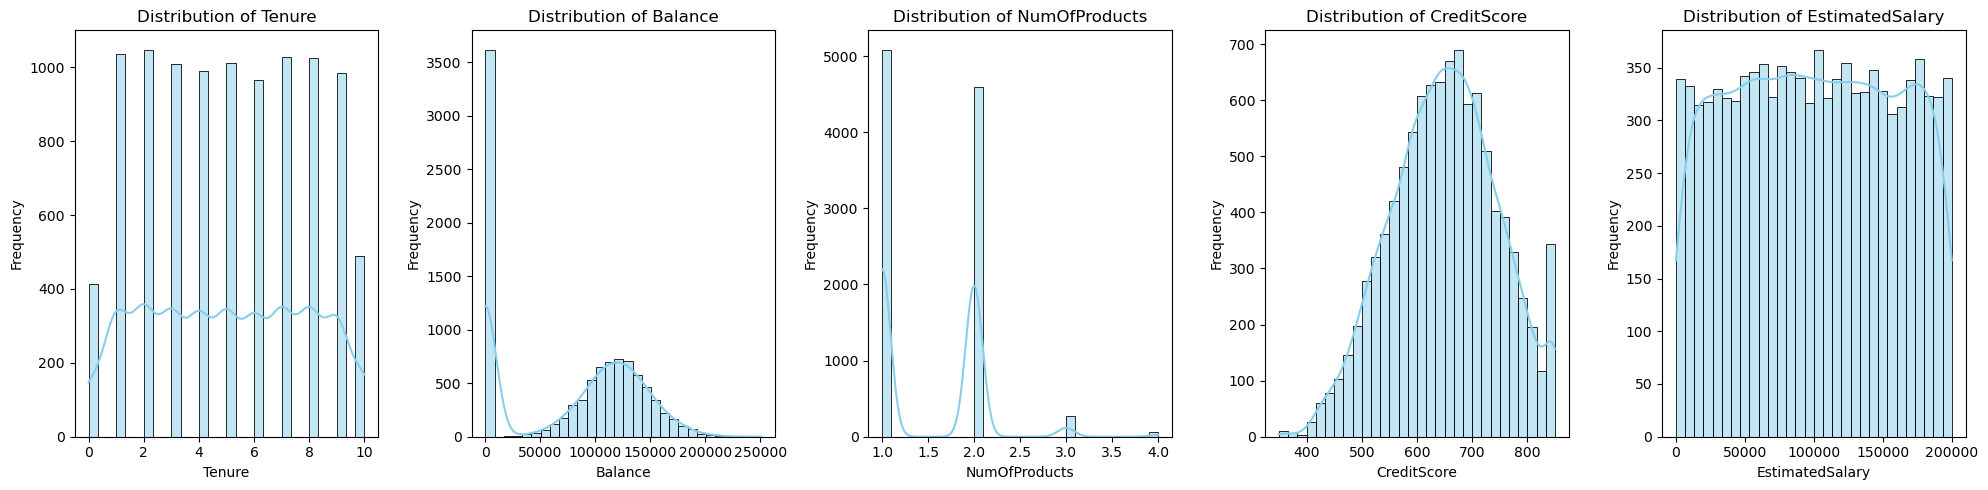

In [11]:
numerical_column = ['Tenure', 'Balance', 'NumOfProducts','CreditScore','EstimatedSalary']
plt.figure(figsize=(20,5))
for i,col in enumerate(numerical_column,1):
    plt.subplot(1,5,i)
    sns.histplot(df[col],kde = True,bins = 30,color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show

In [12]:
categorical_columns = df.select_dtypes(['object']).columns
categorical_columns

Index(['Geography', 'Gender'], dtype='object')

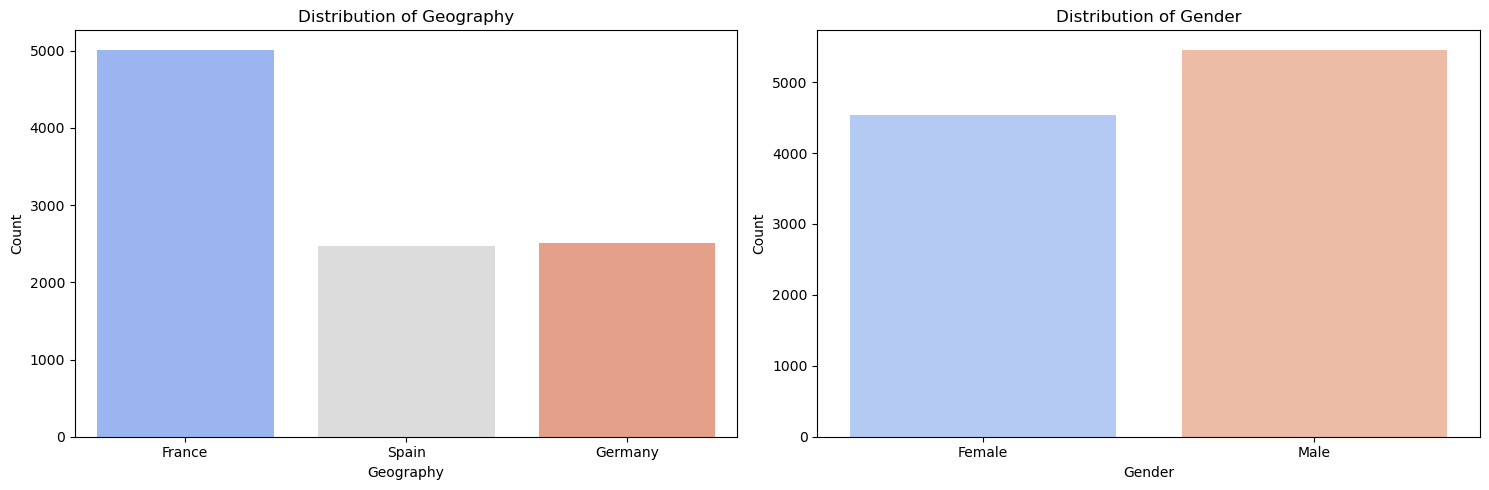

In [13]:
categorical_columns = ['Geography', 'Gender']
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=column,palette='coolwarm')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

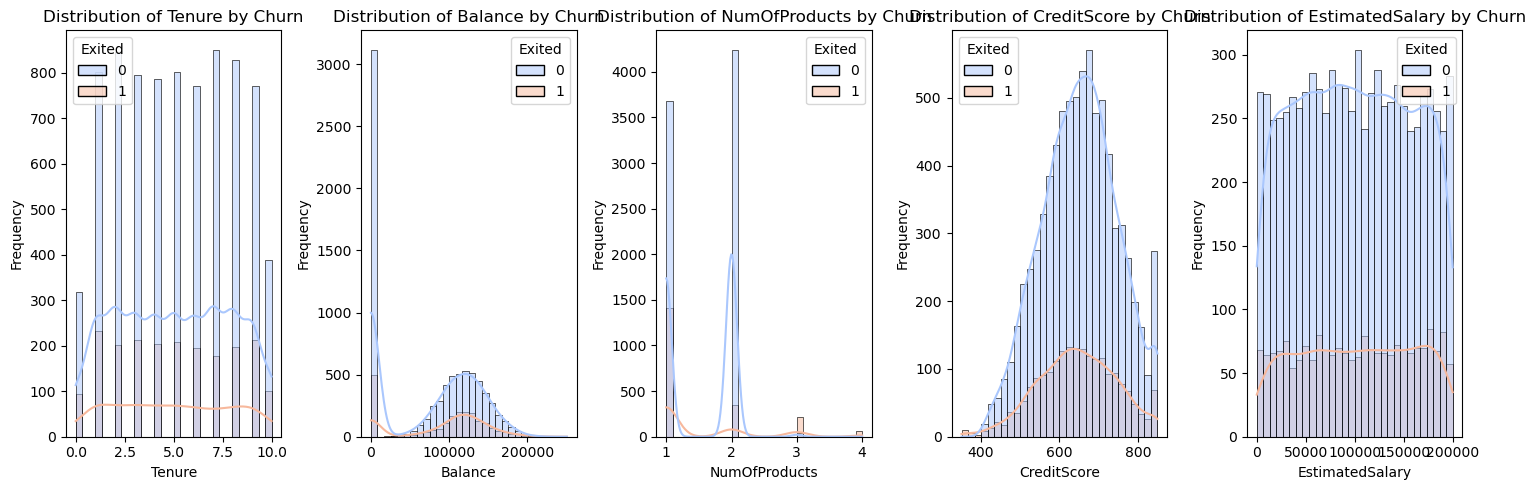

In [14]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_column, 1):
    plt.subplot(1, 5, i)
    sns.histplot(data=df, x=column, hue="Exited", kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {column} by Churn')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
numerical_column = df.select_dtypes(include=['int64', 'float64']).columns
numerical_column

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

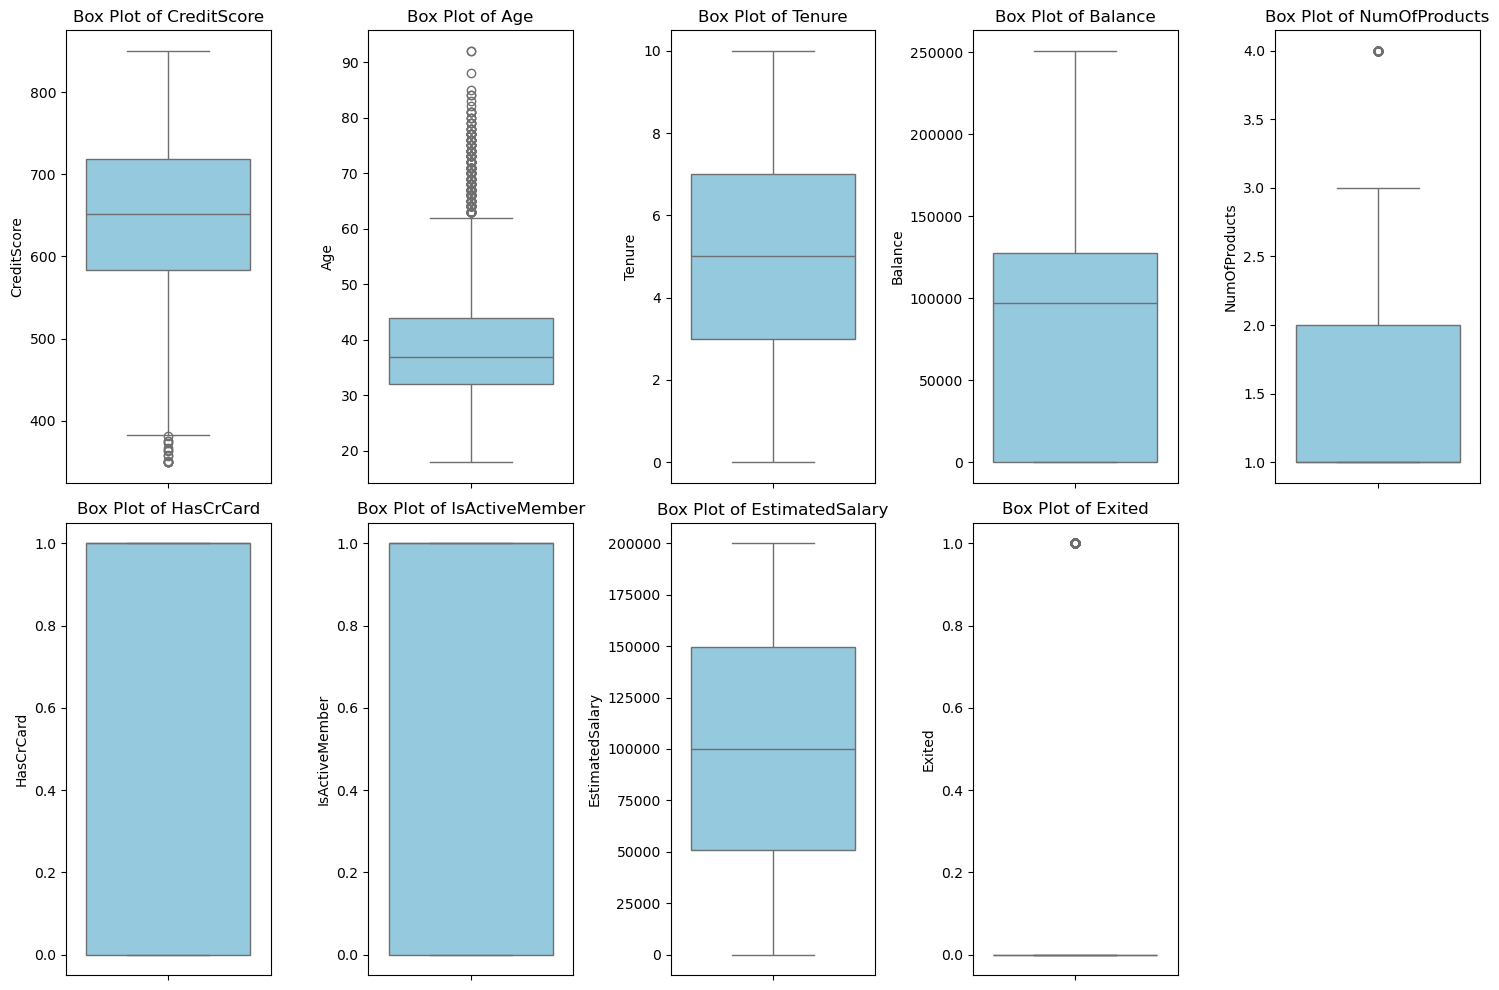

In [17]:
# Create box plots for all numeric columns
plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility
for i, column in enumerate(numerical_column, 1):
    plt.subplot(2, 5, i)  # Adjust subplot grid based on the number of numeric columns
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [18]:
def outlier_detection(data,columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        
        lower = q1 - (1.5*iqr)
        upper = q3 + (1.5*iqr)
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [19]:
outlier_detection(df,df[['Age','CreditScore']])

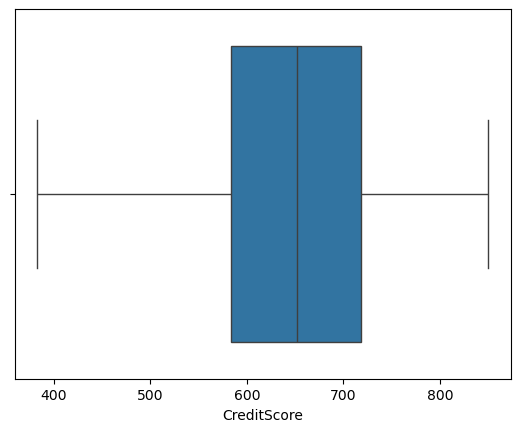

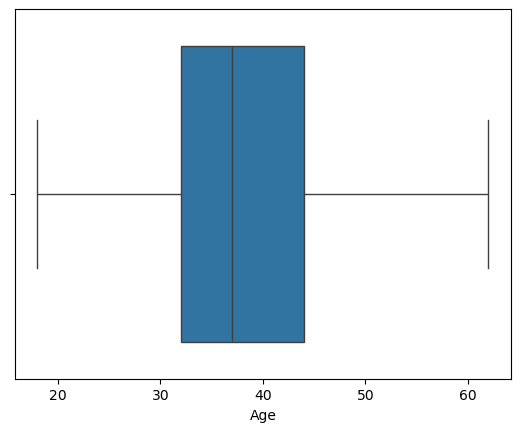

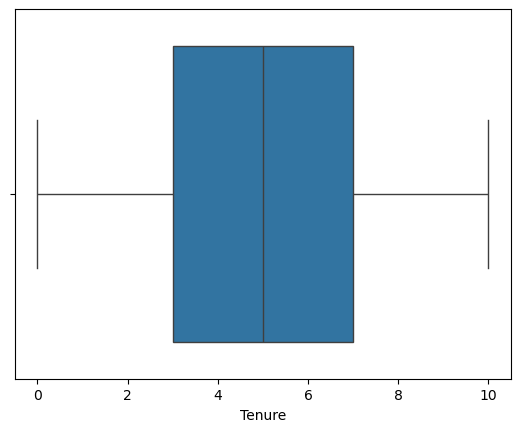

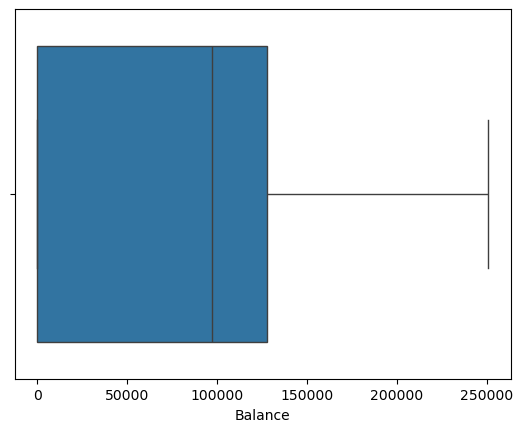

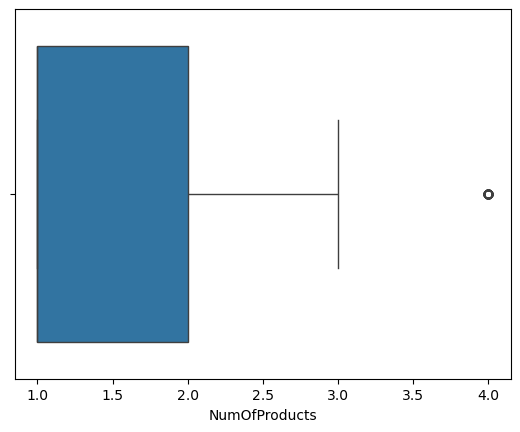

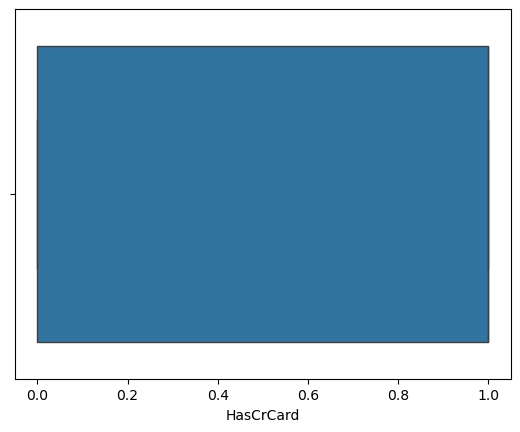

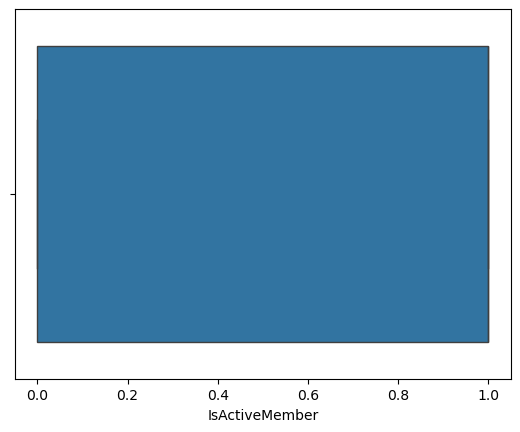

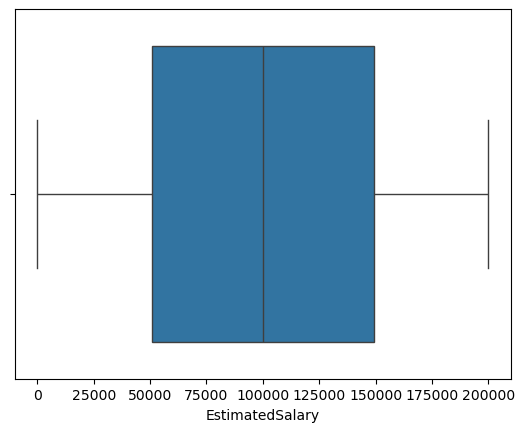

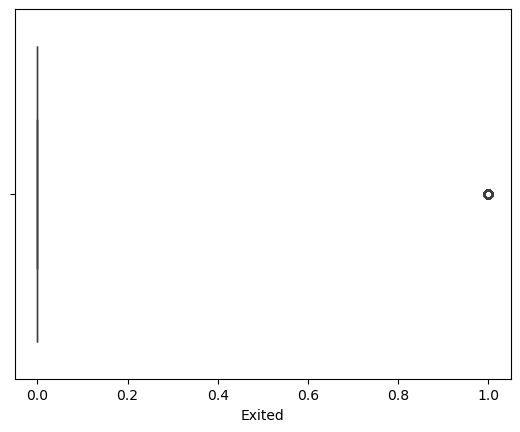

In [20]:
for col in numerical_column:
    sns.boxplot(x = df[col])
    plt.show()

In [21]:
# Check skewness of tenure
print("Skewness of tenure:", skew(df['Tenure'].dropna()))

Skewness of tenure: 0.010989809189781041


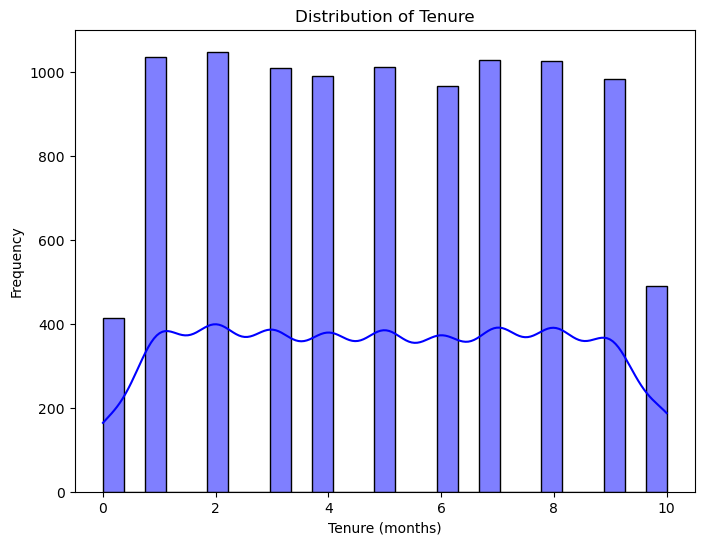

In [22]:
# Plot histogram of tenure
plt.figure(figsize=(8, 6))
sns.histplot(df['Tenure'], kde=True, color='blue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

Skewness of tenure: 0.010989809189781041


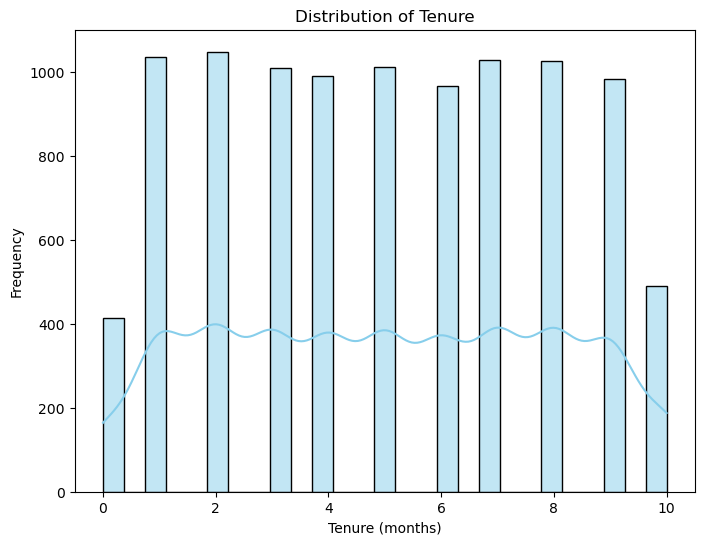

In [23]:
# Check skewness of tenure
print("Skewness of tenure:", skew(df['Tenure'].dropna()))

# Plot histogram of tenure
plt.figure(figsize=(8, 6))
sns.histplot(df['Tenure'], kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

In [24]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [25]:
df['Geography'] = df['Geography'].map({'France':0,'Spain':1,'Germany':2})

In [26]:
df['Geography'].unique()

array([0, 1, 2], dtype=int64)

In [27]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [28]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [29]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [31]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.32687761, -0.9025865 , -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44080365,  0.301665  , -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53863634, -0.9025865 , -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60524449, -0.9025865 , -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25772996,  1.50591651,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.4648682 , -0.9025865 , -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [34]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686.0,0,1,32.0,6,0.00,2,1,1,179093.26
1561,632.0,2,1,42.0,4,119624.60,2,1,1,195978.86
1670,559.0,1,1,24.0,3,114739.92,1,1,0,85891.02
6087,561.0,0,0,27.0,9,135637.00,1,1,0,153080.40
6669,517.0,0,1,56.0,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768.0,0,1,54.0,8,69712.74,1,1,1,69381.05
5191,682.0,0,0,58.0,1,0.00,1,1,1,706.50
5390,735.0,0,0,38.0,1,0.00,3,0,0,92220.12
860,667.0,0,1,43.0,8,190227.46,1,1,0,97508.04


In [35]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

In [36]:
#Random Forest

In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# List to store results
results = []

# Train, predict, and evaluate models
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    })
    
    # Print results
    print(f"{model_name} Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc}")
    print("-" * 30)

# Display summary results
print("Summary Results:")
for result in results:
    print(result)


Training and evaluating Logistic Regression...
Logistic Regression Performance:
  Accuracy: 0.8050
  Precision: 0.5155
  Recall: 0.1272
  F1-Score: 0.2041
  ROC AUC: 0.6878747717919853
------------------------------
Training and evaluating Decision Tree...
Decision Tree Performance:
  Accuracy: 0.7815
  Precision: 0.4500
  Recall: 0.5038
  F1-Score: 0.4754
  ROC AUC: 0.6766128151170688
------------------------------
Training and evaluating Random Forest...
Random Forest Performance:
  Accuracy: 0.8690
  Precision: 0.7610
  Recall: 0.4860
  F1-Score: 0.5932
  ROC AUC: 0.8624790396975066
------------------------------
Training and evaluating Gradient Boosting...
Gradient Boosting Performance:
  Accuracy: 0.8650
  Precision: 0.7450
  Recall: 0.4758
  F1-Score: 0.5807
  ROC AUC: 0.8701910059520134
------------------------------
Training and evaluating Support Vector Machine...
Support Vector Machine Performance:
  Accuracy: 0.8035
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
  R

In [46]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [47]:
gb_pred = gb_model.predict(X_test)
gb_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

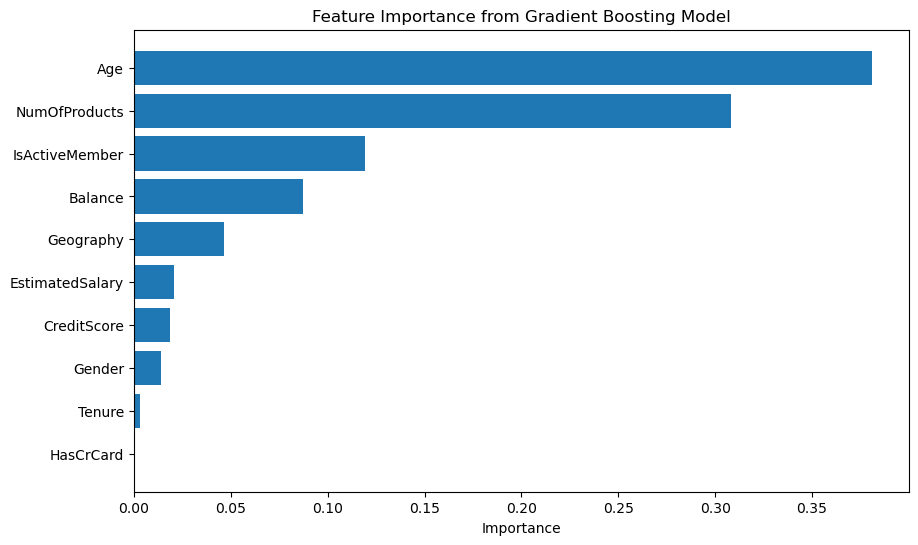

In [51]:
# Create a DataFrame with feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Gradient Boosting Model')
plt.show()

In [39]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,1,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,1,0,43.0,2,125510.82,1,1,1,79084.10,0


In [40]:
transformer = ColumnTransformer(transformers=[
    ('num', StandardScaler(),[0,3,4,5,6,7,8,9]),
    ('cat', OneHotEncoder(handle_unknown='ignore'), [1,2])
], remainder='passthrough')

In [41]:
model = Pipeline(steps=[('transformer', transformer),
                        ('model',GradientBoostingClassifier(n_estimators=100, random_state=42,learning_rate=0.01))])

In [42]:
model.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [1, 2])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            random_state=42))])

In [43]:
ypred = model.predict(X_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
importances = model.feature_importances_

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [44]:
import joblib
with open('chrun_pred.pkl', 'wb') as f:
    joblib.dump(model, f)